In [1]:
# import libraries
from wordcloud_fa import WordCloudFa
import numpy as np
from PIL import Image
import random
from hazm import *
import os, re, itertools

In [2]:
# Define the path to the directory containing the files to be processed
PATH = "./Data/holooland/"

# Define output resolution
RESOLUTION = (800, 800)

In [3]:
# load comments
with open(PATH + "Comments.txt", "r", encoding="utf-8") as f:
    # skip the first commnet line
    f.readline()
    comments = f.read()

In [4]:
def clean(text):
    normalizer = Normalizer()
    # Remove URLs, User Mentions and Hashtags and Retweets and Numbers and zero-width spaces
    text = normalizer.normalize(re.sub(r"(?:\@|https?\://|\d+)\S+", "", text).replace("RT", "").replace("#", "").replace("_", " ").replace("\n", " ").\
    replace("\u200b", " ").replace("\u200c", " "))

    # Replace Repetitions of Punctuation and Charector
    text = ''.join(ch for ch, _ in itertools.groupby(text))

    # Remove Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text.strip()

In [5]:
# Clean and create shuffled text of all comments to prevent sequence bias
words = clean(comments).split()
random.seed(42)
random.shuffle(words)
shuffled_comments = ' '.join(words)

In [6]:
# Words to be replaced or removed from the text
replace = {' شده ': ' شد ', ' ارایه': ' ارائه', ' یه ': ' یک ', ' اگه ': ' اگر ', ' کنم ': ' کن ', ' کنه ': ' کند ', 'میخوام': 'میخواهم', 'نداره': 'ندارد', 
            ' میشه ': ' میشود ', ' باشه ': ' باشد ', ' میکن ': ' میکنند ', ' داره ': ' دارد ', ' نمیشه ': ' نمیشود ', ' میشم ': ' میشوم ', ' میتونم ': ' میتوانم ',
            ' برا ': ' برای ', ' نمیکنه ': ' نمیکند ', ' کنین ': ' کنید ', ' دیگه ': ' دیگر '}
remove = [" باشید ", " میکند ", " کردم ", " کنید ", " شد ", " هست ", " میشود ", " میباشد ", " باشد ", " میکنند ", " دارم "," کن ", " سلام " ," لطفا ", " عرض " ,
        " ندارد ", " داشته " ," نمیشود ", "کردن", " د ", " م ", " ی ", " ید ", " ش ", " ه ", " ن ", " ین ", " منون ", " بده ", " دارید ", " بدم ", " کرد ", 
        " میگیرد ", " کند ", " میخواهم ", " نمیشود ", " میدهند ", " میشوم ", " میتوانم ", " نمیکند ", " بود ", " نیست "]

In [7]:
# Define stopwords
stwd = ['همچنان', 'مدت', 'چیز', 'سایر', 'جا', 'طی', 'کل', 'کنونی', 'بیرون','های', 'مثلا', 'کامل','ها', 'کاملا','گیرد','شود','است', 'آنکه', 
            'موارد', 'واقعی', 'امور', 'اکنون', 'بطور', 'بخشی', 'تحت', 'چگونه', 'عدم', 'نوعی', 'حاضر', 'وضع', 'مقابل', 'کنار', 'خویش', 'نگاه', 'درون',
            'زمانی', 'بنابراین', 'تو', 'خیلی', 'بزرگ', 'خودش', 'جز', 'اینجا', 'مختلف', 'توسط', 'نوع', 'همچنین', 'آنجا', 'قبل', 'جناح', 'اینها', 'طور', 'شاید',
            'ایشان', 'جهت', 'طریق', 'مانند', 'پیدا', 'ممکن', 'کسانی', 'جای', 'کسی', 'غیر', 'بی', 'قابل', 'درباره', 'جدید', 'وقتی', 'اخیر', 'چرا', 'بیش',
            'روی', 'طرف', 'جریان', 'زیر', 'آنچه', 'البته', 'فقط', 'چیزی', 'چون', 'برابر', 'هنوز', 'بخش', 'زمینه', 'بین', 'بدون', 'استفاد', 'همان', 'نشان',
            'بسیاری', 'بعد', 'عمل', 'روز', 'اعلام', 'چند', 'آنان', 'بلکه', 'امروز', 'تمام', 'بیشتر', 'آیا', 'برخی', 'علیه', 'دیگری', 'ویژه', 'گذشته', 'انجام',
            'حتی', 'داده', 'راه', 'سوی', 'ولی', 'زمان', 'حال', 'تنها', 'بسیار', 'یعنی', 'عنوان', 'همین', 'هبچ', 'پیش', 'وی', 'یکی', 'اینکه', 'وجود'
            , 'شما', 'پس', 'چنین', 'میان', 'مورد', 'چه', 'اگر', 'همه', 'نه', 'دیگر', 'آنها', 'باید', 'هر', 'او', 'ما', 'من', 'تا', 'نیز', 'اما', 
            'یک', 'خود', 'بر', 'یا', 'هم','ای', 'رو', 'را','دارد', 'این',"می", 'با','دارد','،',',','.', 'آن', 'برای', 'و', 'در', 'به', 'که', 'از',
            'ده','نه','هشت','هفت','شش','پنج','چهار','سه','دو','خ'
]

In [8]:
# Combine software word together after shuffleing
shuffled_comments = shuffled_comments.replace('افزار', '').replace('نرم', 'نرم افزار')

# Replace misspelled words and remove non-informative words
for key, value in replace.items():
    shuffled_comments = shuffled_comments.replace(key, value)

for word in remove:
    shuffled_comments = shuffled_comments.replace(word, '')

In [9]:
# Open logo image and resize it to output size
logo_img = Image.open(os.path.join(PATH, "Logo.png")).resize(RESOLUTION)

# Convert logo to gray scale and then to numpy array
mask = np.array(logo_img.convert('L'))

# Convert logo to black and white pixels to be used as a mask
mask[ mask == 0 ] = 255
mask[ mask != 255 ] = 0

In [10]:
# Create a word cloud object
wordcloud = WordCloudFa(persian_normalize=True, include_numbers=False, stopwords=stwd, width=RESOLUTION[0], height=RESOLUTION[1], 
                        mask=mask, background_color='white', random_state=10, colormap='winter').generate(shuffled_comments)

# Create image from word cloud
word_cloud_image = wordcloud.to_image()

# Uncomment to show word cloud
# display(word_cloud_image)

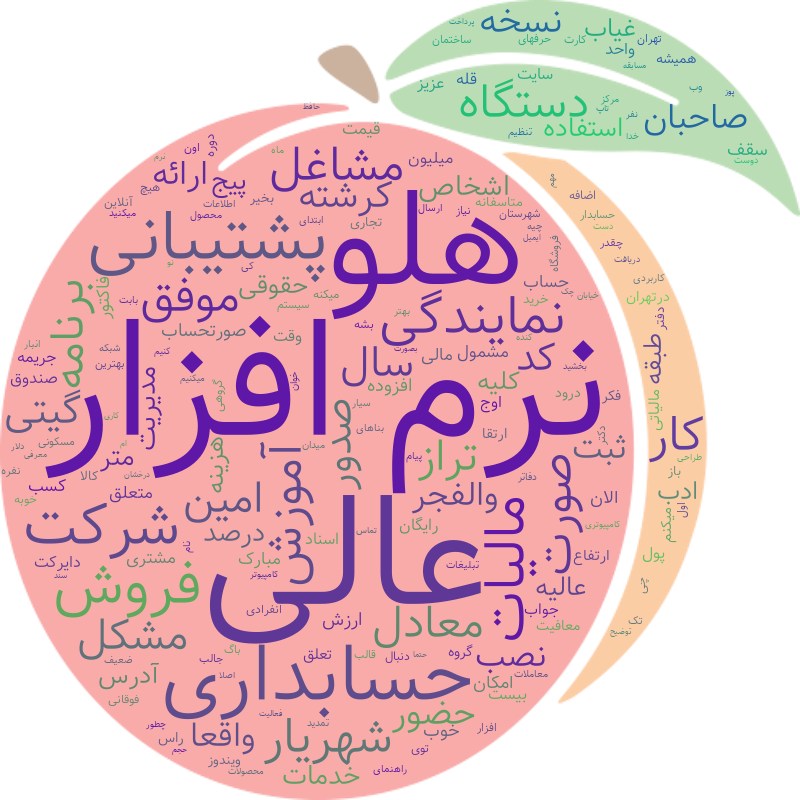

In [11]:
# Add white background to logo image
background = Image.new("RGBA", logo_img.size, "WHITE")
background.paste(logo_img, (0, 0), logo_img)

# Blend word cloud image with background with alpha value of 0.6
result_img = Image.blend(background, word_cloud_image.convert("RGBA"), 0.6)

# Save word cloud image with background
result_img.save(os.path.join(PATH, "word_cloud.png"))

display(result_img)